<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 2*

---

# 📝 Assignment

# 1. 데이터셋 불러오기 

- 서울시 기간별 시간평균 대기환경 정보 데이터셋을 사용합니다.

  https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do

- `2020년 3월`의 송파구 데이터만 사용합니다. 

- 데이터셋을 불러와 변수 `df`에 저장합니다.

- `측정일시`, `측정소명`, `오존(ppm)` column만 사용합니다.

- index를 초기화합니다.

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

file = files.upload()

Saving 서울시_기간별_시간평균_대기환경_정보_2020.03.csv to 서울시_기간별_시간평균_대기환경_정보_2020.03.csv


In [100]:
# DataFrame Wrangling
df = pd.read_csv('서울시_기간별_시간평균_대기환경_정보_2020.03.csv', encoding='cp949')
df = df[['측정일시', '측정소명','오존(ppm)']]
df = df.query('측정소명 == \'송파구\'')
df.reset_index(drop = True, inplace = True)
df

,측정일시,측정소명,오존(ppm)
0,202003312300,송파구,0.020
1,202003312200,송파구,0.021
2,202003312100,송파구,0.025
3,202003312000,송파구,0.032
4,202003311900,송파구,0.034
...,...,...,...
739,202003010400,송파구,0.002
740,202003010300,송파구,0.002
741,202003010200,송파구,0.002
742,202003010100,송파구,0.002


# 2. 큰 수의 법칙

표본 크기가 커질수록 표본평균이 모평균에 가까워지는 것을 확인합니다. 

- `df['오존(ppm)']`을 모집단으로 하였을 때, 모평균을 `pop_mean`에 저장합니다. 

- 모집단에서 10개의 데이터를 추출하여 평균을 `sample_10_mean`에 저장합니다.

- 모집단에서 200개의 데이터를 추출하여 평균을 `sample_200_mean`에 저장합니다. 

- `.sample()` 함수를 활용합니다. 
  - `random_state=42`로 설정합니다. 

- 다음과 같이 시각화 합니다.  

  <img src = 'https://i.imgur.com/jlhzucj.png'>

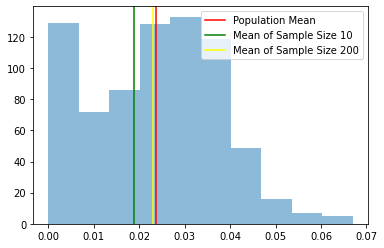

In [101]:
# 미리 random 세부사항 설정
import random

# 변수 설정
pop_mean = df['오존(ppm)'].mean()
sample_10 = df.sample(10, random_state = 42)
sample_200 = df.sample(200, random_state = 42)
sample_10_mean = sample_10['오존(ppm)'].mean()
sample_200_mean = sample_200['오존(ppm)'].mean()

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['오존(ppm)'], bins = 10, alpha = 0.5)
plt.axvline(x= pop_mean, c='red', label = 'Population Mean')
plt.axvline(x= sample_10_mean, c='green', label = 'Mean of Sample Size 10')
plt.axvline(x= sample_200_mean, c='yellow', label = 'Mean of Sample Size 200')
plt.legend()
plt.show()


# 3. 중심극한정리 

표본 평균들의 분포가 정규분포를 이루는지 확인합니다.  

- numpy의 `randam.choice()` 함수를 활용하여 `df['오존(ppm)']`에서 20개의 데이터를 추출합니다.

- 20개의 데이터의 평균을 계산하여 리스트 `s1`에 저장합니다. 

- 위 과정을 `for loop`을 이용하여 10,000번 반복합니다. 즉, `s1`에는 10,000번 추출된 20개의 데이터의 평균값이 저장됩니다. 

- 평균값들의 분포를 `seaborn.kdeplot()`을 활용하여 시각화 하세요.

  https://seaborn.pydata.org/generated/seaborn.kdeplot.html

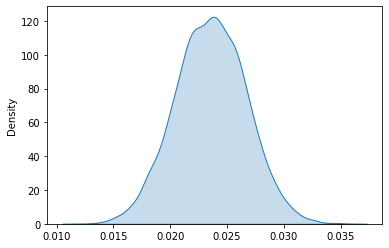

In [102]:
# s1 만들기
s1 = []
for i in range(10000):
  sample = np.random.choice(df['오존(ppm)'], 20, replace = True)
  s1.append(sample.mean())

# 시각화
sns.kdeplot(s1, shade = True);

# 4. 신뢰구간 

2번에서 빌드한 표본 평균 분포에 대하여 모집단의 모수를 포함할 확률이 95%가 되는 구간을 나타냅니다. 

- 평균은 초록 세로선으로, 신뢰구간 95% 구간은 빨간 세로선으로 나타내세요. 

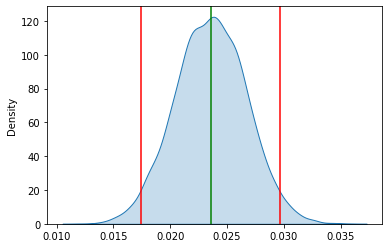

In [103]:
# 신뢰구간 찾기
lower = np.percentile(s1, 2.5)
upper = np.percentile(s1, 97.5)

# 시각화
sns.kdeplot(s1, shade = True)
plt.axvline(pop_mean, c='green')
plt.axvline(lower, c='red')
plt.axvline(upper, c='red')
plt.show()

# 🔥 도전 과제

**2번에서 구한 두 표본 `sample_10`, `sample_200`을 계속 사용합니다.**

- 한 표본의 신뢰구간을 수학적으로 다음 식과 같이 나타낼 수 있습니다. 

  $\bar{x} ± t \cdot {s\over \sqrt{n}}$

  - $\bar{x}$ : 표본의 평균
  - $t$ : t-value
  - $s$ : 표본의 표준편차
  - $n$ : 데이터 수 

- 위의 신뢰구간 식과 `plt.bar()`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요. 

  <img src = 'https://i.imgur.com/E0NkLdl.png'>

- 위의 시각화로부터 도출할 수 있는 insight를 설명해 보세요. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


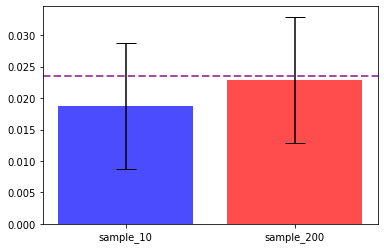

In [126]:
import math as m
index = np.arange(2)
height = [sample_10_mean, sample_200_mean]
pop_var = df['오존(ppm)'].var()
pop_stde = m.sqrt(pop_var)

 # T-value 공부하고 다시 풀기
sample_10_stde = m.sqrt(sample_10.var())
plt.bar(index, height, color = ['blue', 'red'], alpha = 0.7, yerr = [0.01,0.01], capsize =10)
plt.xticks(index, ['sample_10', 'sample_200'])
plt.axhline(pop_mean, c='purple', linestyle='--', linewidth=2, alpha = 0.7)
plt.show()